
image 1/1 /data/corob/experiments/plates-segment/notebooks/images/sequence-3/rgb_000.png: 1088x1920 1 Plate 2, 70.2ms
Speed: 7.2ms preprocess, 70.2ms inference, 100.2ms postprocess per image at shape (1, 3, 1088, 1920)

image 1/1 /data/corob/experiments/plates-segment/notebooks/images/sequence-3/rgb_000.png: 1088x1920 1 Plate 2, 7.7ms
Speed: 4.7ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)
(1088, 1920)
[{'name': 'Plate 2', 'confidence': np.float32(0.834771), 'area': 55534, 'x': 2.7333333333333334, 'y': 0.184375, 'z': 30, 'theta': 1.3177206391337628}]


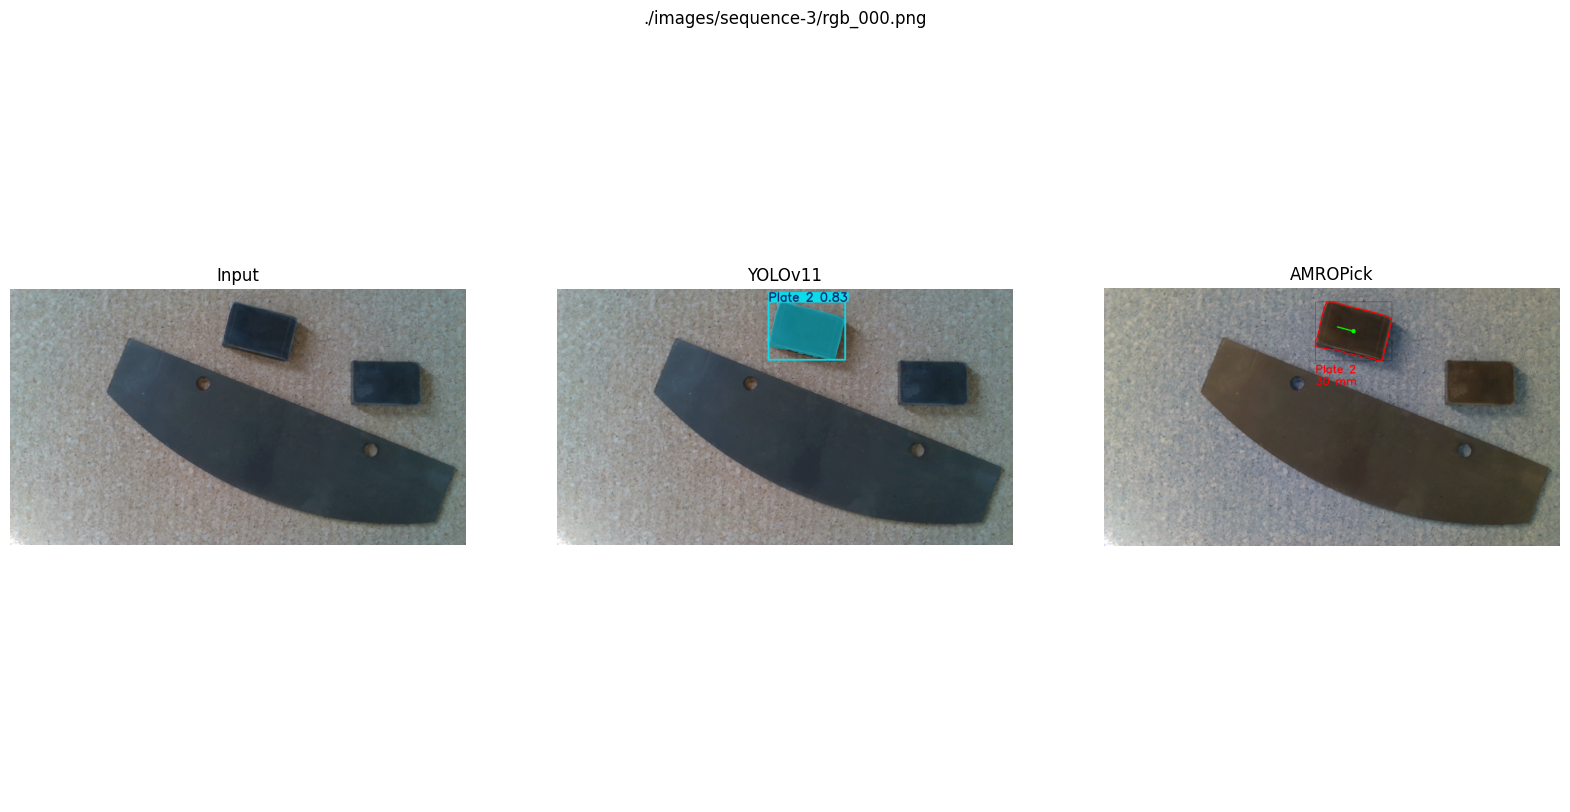

In [1]:
%run processing.ipynb
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
import math
import glob

# train11 is trained with yolo train data=./dataset/data.yaml batch=0.8 model=yolo11n-seg.pt imgsz=1280 device=0 epochs=1000 patience=250
# train13 is trained with yolo train data=./dataset/data.yaml batch=0.8 model=yolo11n-seg.pt imgsz=1920 device=0 epochs=2000 patience=300

model = YOLO("../runs/segment/train13/weights/best.pt")

images = sorted(glob.glob("./images/sequence-3/rgb_*.png"))

for i in range(len(images)):
    result = model(images[i], conf=0.7)[0]

    processed, detected_objects, _ = process_image(images[i], model)

    print(detected_objects)
    
    plt.figure(figsize=(20, 10))
    plt.axis('off')
    plt.title(images[i])
    plt.subplot(131)
    plt.title("Input")
    plt.imshow(cv2.cvtColor(cv2.imread(images[i]), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.subplot(132)
    plt.title("YOLOv11")
    plt.imshow(cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.subplot(133)
    plt.title("AMROPick")
    plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()